### Wellcome to EDA work

The purpose of this notebook is to just explore a chunk of data.

The challages are:

* Very large files
* Data format
* May be some transformations and cleaning

In [1]:
import numpy as np
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
review_lf = pl.scan_ndjson("data/yelp/review-001.json")
ctx = pl.SQLContext(register_globals=True, eager_execution=True)
df_small = ctx.execute("SELECT COUNT(date) FROM review_lf")
print(df_small)

shape: (1, 1)
┌─────────┐
│ date    │
│ ---     │
│ u32     │
╞═════════╡
│ 6990280 │
└─────────┘


In [3]:
review_lf = pl.scan_ndjson("data/yelp/review-001.json")
ctx = pl.SQLContext(lf=review_lf, eager_execution=True)
df_small = ctx.execute("""
                       SELECT *
                       FROM lf 
                       WHERE STARTS_WITH(date, '2018')
                       
                       """)
print(df_small)

shape: (906_362, 9)
┌──────────────┬──────────────┬─────────────┬───────┬───┬───────┬──────┬─────────────┬─────────────┐
│ review_id    ┆ user_id      ┆ business_id ┆ stars ┆ … ┆ funny ┆ cool ┆ text        ┆ date        │
│ ---          ┆ ---          ┆ ---         ┆ ---   ┆   ┆ ---   ┆ ---  ┆ ---         ┆ ---         │
│ str          ┆ str          ┆ str         ┆ f64   ┆   ┆ i64   ┆ i64  ┆ str         ┆ str         │
╞══════════════╪══════════════╪═════════════╪═══════╪═══╪═══════╪══════╪═════════════╪═════════════╡
│ KU_O5udG6zpx ┆ mh_-eMZ6K5RL ┆ XQfwVwDr-v0 ┆ 3.0   ┆ … ┆ 0     ┆ 0    ┆ If you      ┆ 2018-07-07  │
│ Og-VcAEodg   ┆ WhZyISBhwA   ┆ ZS3_CbbE5Xw ┆       ┆   ┆       ┆      ┆ decide to   ┆ 22:09:11    │
│              ┆              ┆             ┆       ┆   ┆       ┆      ┆ eat here,   ┆             │
│              ┆              ┆             ┆       ┆   ┆       ┆      ┆ just …      ┆             │
│ lUUhg8ltDsUZ ┆ RreNy--tOmXM ┆ cPepkJeRMtH ┆ 4.0   ┆ … ┆ 0     ┆ 1    

In [4]:
yelp_df_2018 = df_small.to_pandas()

In [5]:
yelp_df_2018["date"] = pd.to_datetime(yelp_df_2018["date"])

In [6]:
yelp_df_2018

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4.0,1,0,1,I was really between 3 and 4 stars for this on...,2018-07-17 03:30:07
2,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38
3,E9AB7V4z8xrt2uPF7T55FQ,iYY5Ii1LGpZCpXFkHlMefw,Zx7n8mdt8OzLRXVzolXNhQ,5.0,0,0,0,Amazing biscuits and (fill in the blank). Grea...,2018-04-27 23:03:21
4,A4n4YaE-owOVgTQcrVqHUw,S7bjj-L07JuRr-tpX1UZLw,I6L0Zxi5Ww0zEWSAVgngeQ,4.0,0,0,0,The cafe was extremely cute. We came at 8am an...,2018-07-07 20:50:12
...,...,...,...,...,...,...,...,...,...
906357,CphIcLTNU26TDb_YTOSgUQ,Is5IWDXWtqVMCVtedjJIQQ,VOITl4HlmC1EGJ_wVMS6_w,5.0,0,0,0,I compete in Jiu-Jitsu and every competition I...,2018-11-09 18:09:35
906358,e2owJAzHYo89x88eReSqGg,QYZM8lgZn2HL_OWYAn7E1A,nrXtCSdfWg0TJ86onEZWkg,4.0,1,0,0,Took a colleague here for dinner as we were tr...,2018-02-13 19:50:01
906359,_b_SOIkWHsNPRGW4RM3X5w,L_fdAnrH5Pxi4PqF08_ToA,ez4kMLP6OJEIaMbMrrGRdA,5.0,1,1,1,My sister and I went on the ghost tour with Th...,2018-12-10 16:31:32
906360,cACxcUY_AIsQKkpDRXuqnw,MCzlzlOw7IGbRAKVjJBPtg,fcGexL5VH5G2Xw0tRj9uOQ,3.0,1,1,0,This is a good pizza option - they deliver thr...,2018-03-13 13:54:48


In [7]:
yelp_user_df = pd.read_parquet("data/yelp/user-002.parquet")

In [8]:
import sys
sys.getsizeof(yelp_user_df) / 1000000

3834.143829

In [9]:
yelp_user_df.dtypes

user_id                object
name                   object
review_count            int64
yelping_since          object
useful                  int64
funny                   int64
cool                    int64
elite                  object
friends                object
fans                    int64
average_stars         float64
compliment_hot          int64
compliment_more         int64
compliment_profile      int64
compliment_cute         int64
compliment_list         int64
compliment_note         int64
compliment_plain        int64
compliment_cool         int64
compliment_funny        int64
compliment_writer       int64
compliment_photos       int64
dtype: object

In [10]:
yelp_user_df.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [11]:
yelp_user_df.shape

(2105597, 22)

In [12]:
# Dangerous code! This will run something very large computationally talking 
# yelp_user_df.agg([np.mean, np.median, np.std])

In [13]:
yelp_2018 = yelp_df_2018.merge(yelp_user_df, on="user_id")

In [14]:
yelp_2018.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful_x', 'funny_x',
       'cool_x', 'text', 'date', 'name', 'review_count', 'yelping_since',
       'useful_y', 'funny_y', 'cool_y', 'elite', 'friends', 'fans',
       'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos'],
      dtype='object')

In [15]:
yelp_2018[yelp_2018.duplicated(subset=["user_id"])][['review_id', 'user_id', 'business_id', 'stars', 'useful_x', 'funny_x',
       'cool_x', 'text', 'date', 'name', 'review_count', 'yelping_since',
       'useful_y', 'funny_y', 'cool_y', 'elite', 'friends', 'fans',
       'average_stars']].head()#.groupby("user_id").count().sort_values(by="review_id", ascending=False)

,review_id,user_id,business_id,stars,useful_x,funny_x,cool_x,text,date,name,review_count,yelping_since,useful_y,funny_y,cool_y,elite,friends,fans,average_stars
1,Bqn8psEmvYTO7izrnGNgqg,mh_-eMZ6K5RLWhZyISBhwA,8eDkw7CE0NKqMknPIu26fw,5.0,1,0,0,We tried this place on our first trip to New O...,2018-04-25 17:04:09,Melanie,33,2016-01-13 17:20:44,32,3,8,,"DS9QBM_NWJz1E279Zrao-A, XdXgIs4i5JFvtJf0rJlWsA...",0,4.06
2,78MWkzX8uQz0kDnhlhwAAg,mh_-eMZ6K5RLWhZyISBhwA,mOk3D7VczrDapNuUgLxUQw,4.0,2,0,2,So glad we stumbled upon this restaurant! It i...,2018-10-29 21:54:59,Melanie,33,2016-01-13 17:20:44,32,3,8,,"DS9QBM_NWJz1E279Zrao-A, XdXgIs4i5JFvtJf0rJlWsA...",0,4.06
3,krpCZHUj222Ha7AffGUZHQ,mh_-eMZ6K5RLWhZyISBhwA,L4kfcADLCU4T33i7Z0CkuA,2.0,3,0,1,I was looking forward to a romantic dinner her...,2018-02-11 03:07:30,Melanie,33,2016-01-13 17:20:44,32,3,8,,"DS9QBM_NWJz1E279Zrao-A, XdXgIs4i5JFvtJf0rJlWsA...",0,4.06
4,JpVqv0oZNcZyd9NqgG7tTA,mh_-eMZ6K5RLWhZyISBhwA,QWF_PoD4PthsYsq2Tk0GEQ,3.0,0,0,0,We moved to this area recently and have been l...,2018-01-21 18:08:11,Melanie,33,2016-01-13 17:20:44,32,3,8,,"DS9QBM_NWJz1E279Zrao-A, XdXgIs4i5JFvtJf0rJlWsA...",0,4.06
5,TbExVvMwCPOcKZwBq-uWRg,mh_-eMZ6K5RLWhZyISBhwA,v43sH62YQMO60zIiLR65DA,4.0,0,0,0,We like this place because of its convenience ...,2018-06-21 22:34:21,Melanie,33,2016-01-13 17:20:44,32,3,8,,"DS9QBM_NWJz1E279Zrao-A, XdXgIs4i5JFvtJf0rJlWsA...",0,4.06


In [16]:
# How many users leave a review in 2018?
len(yelp_2018["user_id"].unique())

422063

### Exploring Business Dataset

In [18]:
business_df = pd.read_pickle("data/yelp/Yelp-20230909T191413Z-003/Yelp/business.pkl")

In [19]:
business_df[business_df.iloc[:,0] == "VOITl4HlmC1EGJ_wVMS6_w"]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
146428,VOITl4HlmC1EGJ_wVMS6_w,South Tampa Jiu-Jitsu & MMA,4477 W Gandy Blvd,Tampa,PA,33611,27.894652,-82.520573,5.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
business_df.shape

(150346, 28)

In [22]:
business_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

It seems there are a few duplicated column names... Wha do they contain?

In [23]:
business_df.isna().sum()

business_id          0
name                 0
address              0
city                 0
state                3
postal_code          0
latitude             0
longitude            0
stars                0
review_count         0
is_open              0
attributes       13744
categories         103
hours            23223
business_id     150341
name            150341
address         150341
city            150341
state           150341
postal_code     150341
latitude        150341
longitude       150341
stars           150341
review_count    150341
is_open         150341
attributes      150341
categories      150341
hours           150341
dtype: int64

Certianly, null values only.. but.. that null values counting is bit smaller that the total records.. there should be data to be saved.

Indeed, 5 records that somehow the duplicated columns are not empty.. but.. hw it's happened? I do not know, I let's save this for a while since that question does not belong to the scope

In [24]:
business_df[~business_df.iloc[:,-1].isna()]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
590,6_Zf2QsRHCH1RhbzA9inyw,Starbucks,8602 Hillsborough Ave,Tampa,LA,33615,27.99637,-82.580954,3.0,56,...,LA,33615,27.99637,-82.580954,3.0,56,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Coffee & Tea, Food","{'Monday': '5:30-21:0', 'Tuesday': '5:30-21:0'..."
613,Iipfa9Kaac9XH5Vo8GQwvg,Starbucks,5956 153 Avenue,Edmonton,PA,T5Y 2W1,53.616147,-113.432424,3.5,10,...,PA,T5Y 2W1,53.616147,-113.432424,3.5,10,1,"{'BusinessParking': '{'garage': False, 'street...","Coffee & Tea, Food","{'Monday': '5:30-22:0', 'Tuesday': '5:30-22:0'..."
978,oY6osC4Ch3PvguA7D1hh_w,Starbucks,1251 Route 130 S,Cinnaminson,AZ,08077,40.000157,-74.987313,4.5,7,...,AZ,08077,40.000157,-74.987313,4.5,7,1,"{'WiFi': 'u'free'', 'BusinessParking': '{'gara...","Coffee & Tea, Food","{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'..."
1296,pxuMxh5oC7W-PDN9wwvozg,Starbucks,219 N Center St,Reno,FL,89501,39.527772,-119.812518,3.0,44,...,FL,89501,39.527772,-119.812518,3.0,44,0,"{'BikeParking': 'False', 'Caters': 'False', 'O...","Coffee & Tea, Food","{'Monday': '5:30-19:0', 'Tuesday': '5:30-19:0'..."
1543,lo2VbA7Lwzu3i23pQpmzlw,Starbucks,"1125 S Black Horse Pike, Space 575",Gloucester Township,NJ,08012,39.78403,-75.05207,3.0,15,...,NJ,08012,39.78403,-75.05207,3.0,15,1,"{'BikeParking': 'True', 'RestaurantsPriceRange...","Food, Coffee & Tea","{'Monday': '0:0-0:0', 'Tuesday': '10:30-20:0',..."


but.. do these duplicated columns hold same information?

The following output indicates, they do..

In [25]:
business_df[~business_df.iloc[:,-1].isna()]["categories"] # -> It seems this rows holds same information

,categories,categories
590,"Coffee & Tea, Food","Coffee & Tea, Food"
613,"Coffee & Tea, Food","Coffee & Tea, Food"
978,"Coffee & Tea, Food","Coffee & Tea, Food"
1296,"Coffee & Tea, Food","Coffee & Tea, Food"
1543,"Food, Coffee & Tea","Food, Coffee & Tea"


So let's just drop those duplicated columns.. how? by dropping "na"s through columns whose null values are more than 150k.. but this threshold will add up the null values for the duplicated name columns.. for example.. columns "attributes" one only holds 13477 missing values, and the other one it is almost completely empty.. well, the threshold will drop both columns unfortunataly u.u I think due to column column ambiguity.. so.. getting rid off ambiguity is goint to be essential

* attributes       13744
* categories         103
* hours            23223

In [26]:
business_df["attributes"].iloc[:,0].fillna("{'Attribute': 'Unknown'}",inplace=True)
business_df["categories"].iloc[:,0].fillna("Unknown Category", inplace=True)
business_df["hours"].iloc[:,0].fillna("Unknown Hours", inplace=True)

In [27]:
business_df["attributes"].iloc[:,0].fillna("{'Attribute': 'Unknown'}", inplace=True)

In [28]:
business_df["attributes"].isna().sum()

attributes     13744
attributes    150341
dtype: int64

In [29]:
business_columns = business_df.columns[:14]
business_columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [30]:
business_df.loc[business_df["attributes"].iloc[:,0].isna(), "attributes"].iloc[:,0] = "No attributes"

In [31]:
business_df.columns = range(len(business_df.columns))

In [32]:
business_df.drop(business_df.loc[:,14:].columns, axis=1, inplace=True)

In [33]:
business_df.isna().sum()

0         0
1         0
2         0
3         0
4         3
5         0
6         0
7         0
8         0
9         0
10        0
11    13744
12      103
13    23223
dtype: int64

In [34]:
business_df.columns = business_columns[:14]

### Saving business into parquet file after dropping duplicated columns

In [37]:
#Firt of all, let's have a loot at the output
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [38]:
# business_df.to_parquet(path="data/yelp/business.parquet")

### Getting Unique Categories from Categories Features

In [39]:
categories = business_df["categories"].astype(str).apply(lambda x: x.split(","))

In [40]:
output_category = []
for array_category in categories.tolist():
    for category in array_category:
        output_category.append(category)


In [41]:
categories = pd.DataFrame(output_category)
categories

,0
0,Doctors
1,Traditional Chinese Medicine
2,Naturopathic/Holistic
3,Acupuncture
4,Health & Medical
...,...
668690,Bikes
668691,Beauty & Spas
668692,Permanent Makeup
668693,Piercing


In [42]:
categories.value_counts().sort_values(ascending=False)

 Restaurants           36978
 Food                  20998
 Shopping              18915
Restaurants            15290
 Home Services         10563
                       ...  
 Somali                    1
 College Counseling        1
First Aid Classes          1
 Parklets                  1
 Calabrian                 1
Name: count, Length: 2455, dtype: int64

In [46]:
import ast
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return "hey"

### Visualizing Large Datasets with PySpark

In [44]:
import pyspark
from pyspark.sql import SparkSession

In [45]:
spark = SparkSession.builder.appName("EDA_google_yelp").getOrCreate()
spark

In [46]:
review_full_DS = spark.read.json("data/yelp/review-001.json")

In [47]:
review_full_DS.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [48]:
review_full_DS.createOrReplaceTempView("reviews")

In [49]:
spark.catalog.listTables()

[Table(name='reviews', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]

In [50]:
query_0 = """
SELECT MIN(date), MAX(date) 
FROM reviews
"""
spark.sql(query_0).show()

+-------------------+-------------------+
|          min(date)|          max(date)|
+-------------------+-------------------+
|2005-02-16 03:23:22|2022-01-19 19:48:45|
+-------------------+-------------------+



In [51]:
query_1 = """
SELECT YEAR(date) AS year, COUNT(date) as COUNT 
FROM reviews 
GROUP BY YEAR(date) 
ORDER BY YEAR(date) DESC;
"""
number_of_reviews_along_years = spark.sql(query_1)

In [52]:
reviews_distribution_across_years = number_of_reviews_along_years.toPandas()

<Axes: xlabel='year'>

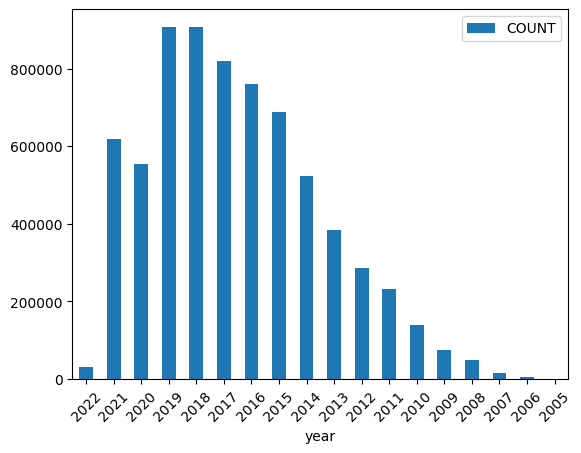

In [53]:
reviews_distribution_across_years.set_index("year").plot(kind="bar", rot=45)

In [54]:
business_full_DS = spark.read.parquet("data/yelp/business.parquet")

In [55]:
business_full_DS.createOrReplaceTempView("business")

In [57]:
business_full_DS.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- address: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- postal_code: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- stars: double (nullable = true)
 |-- review_count: long (nullable = true)
 |-- is_open: long (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking:

In [56]:
spark.catalog.listTables()

[Table(name='business', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='reviews', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]

In [59]:
query_2 = """
SELECT count(name)
FROM business
"""

spark.sql(query_2).show()

+-----------+
|count(name)|
+-----------+
|     150346|
+-----------+



In [61]:
query_3 = """
SELECT *
FROM business
LIMIT 5
"""

spark.sql(query_3).show()

+--------------------+--------------------+--------------------+-------------+-----+-----------+----------+------------+-----+------------+-------+--------------------+--------------------+--------------------+-----------------+
|         business_id|                name|             address|         city|state|postal_code|  latitude|   longitude|stars|review_count|is_open|          attributes|          categories|               hours|__index_level_0__|
+--------------------+--------------------+--------------------+-------------+-----+-----------+----------+------------+-----+------------+-------+--------------------+--------------------+--------------------+-----------------+
|Pns2l4eNsfO8kk83d...|Abby Rappoport, L...|1616 Chapala St, ...|Santa Barbara| null|      93101|34.4266787|-119.7111968|  5.0|           7|      0|{null, null, null...|Doctors, Traditio...|                null|                0|
|mpf3x-BjTdTEA3yCZ...|       The UPS Store|87 Grasso Plaza S...|       Affton| null|

In [62]:
query_4 = """
SELECT *
FROM reviews
LIMIT 5
"""

spark.sql(query_4).show()

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPpI6HXG530lwP...|   0|2014-02-05 20:30:30|    0|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|     0|8g_iMtfSiwikVnbP2...|
|kxX2SOes4o-D3ZQBk...|   1|2015-01-04 00:01:03|    0|AqPFMleE6RsU23_au...|  5.0|Wow!  Yummy, diff...|     1|_7bHUi9Uuf5__HHc_...|
|e4Vwtrqf-wpJfwesg...|   1|2017-01-14 20:54:15|    0|Sx8TMOWLNuJBWer-0...|  4.0|Cute inter